Columns in the DataFrame: Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')
Cleaned Columns: Index(['date', 'symbol', 'series', 'prev close', 'open', 'high', 'low', 'last',
       'close', 'vwap', 'volume', 'turnover', 'trades', 'deliverable volume',
       '%deliverble'],
      dtype='object')
              symbol series  prev close    open    high     low    last  \
date                                                                      
2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

             close    vwa

<ipython-input-2-9dd16b3977f5>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['close'].fillna(method='ffill', inplace=True)  # Forward fill to handle missing data
<ipython-input-2-9dd16b3977f5>:49: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['close'].fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


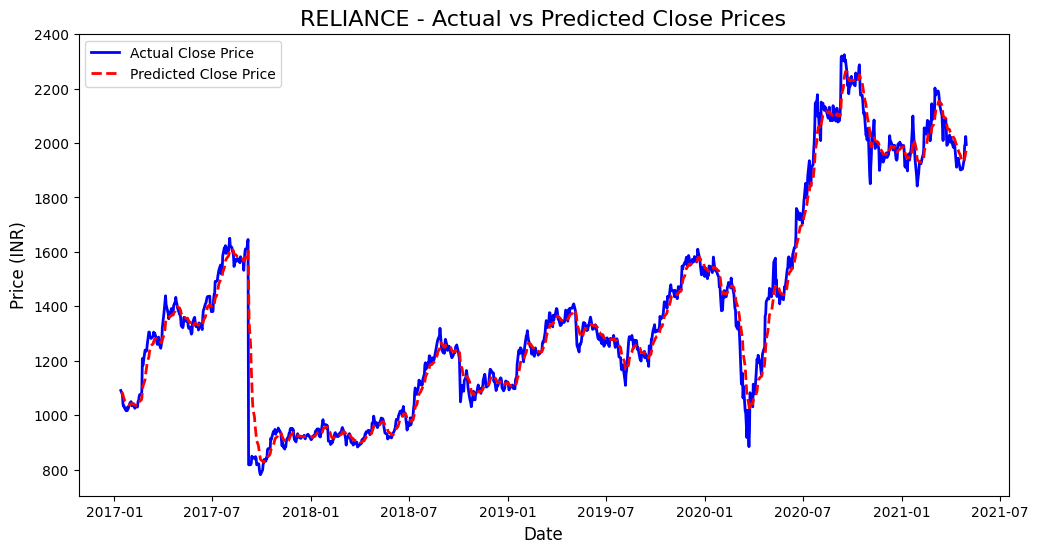

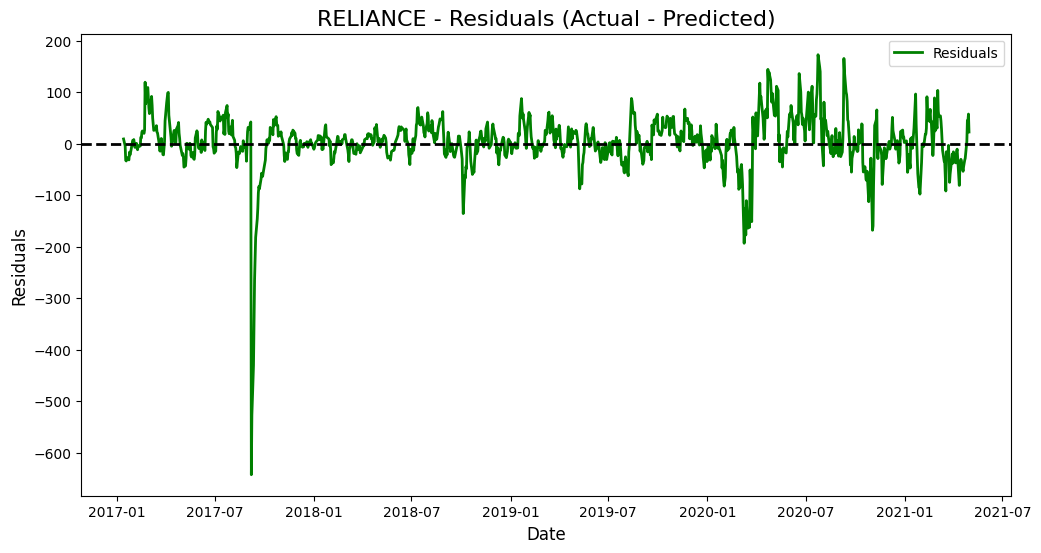

In [2]:

# First, make sure you have the necessary libraries installed
!pip install pandas numpy scikit-learn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load Historical Stock Price Data from the CSV File
# Load the CSV file without parsing dates first
data = pd.read_csv('/content/RELIANCEdata.csv')

# Step 2: Check the column names to see what they're called
print("Columns in the DataFrame:", data.columns)

# Step 3: Clean the column names
# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Convert all column names to lowercase for consistency
data.columns = data.columns.str.lower()

# Check the cleaned column names
print("Cleaned Columns:", data.columns)

# Step 4: Parse the date column manually
# Assuming the date column is now 'date' (adjust if necessary)
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Display the first few rows to confirm the date parsing worked
print(data.head())

# Step 5: Check if the data has the necessary columns
# Ensure the 'close' price is present for training the model


# Step 6: Add Technical Indicators (10-day Exponential Moving Average)
# Ensure the 'close' column exists (adjust column name if needed)
if 'close' not in data.columns:
    raise ValueError("The CSV file must have a 'close' column.")

# Step 1: Handle missing values (optional, but important for calculations)
data['close'].fillna(method='ffill', inplace=True)  # Forward fill to handle missing data

# Step 2: Add 10-day Exponential Moving Average (EMA)
data['10-day EMA'] = data['close'].ewm(span=10, adjust=False).mean()

# Step 3: Check the data with the new feature
print(data[['close', '10-day EMA']].head())

# Display data with the new feature
print(data[['close', '10-day EMA']].head())

# Step 7: Prepare the Features (X) and Target (y) for Linear Regression
# Using '10-day EMA' as the predictor and 'close' as the target
X = data[['10-day EMA']].dropna()  # Features (10-day EMA)
# Correct way to align target variable y with the features X based on the index
y = data.loc[X.index, 'close']

# Step 8: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 9: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Make Predictions
y_pred = model.predict(X_test)

# Step 11: Analyze the Model's Accuracy

# Calculate mean squared error and mean absolute error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Step 12: Plot the Results
plt.figure(figsize=(12,6))

# Plot the actual closing prices and predicted prices
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='dashed', linewidth=2)

plt.title('RELIANCE - Actual vs Predicted Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.legend()

plt.show()

# Optional: Plot the residuals (difference between actual and predicted prices)
residuals = y_test - y_pred
plt.figure(figsize=(12,6))
plt.plot(y_test.index, residuals, label='Residuals', color='green', linewidth=2)
plt.axhline(0, color='black', linestyle='dashed', linewidth=2)
plt.title('RELIANCE - Residuals (Actual - Predicted)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.legend()
plt.show()